In [1179]:
from IPython.display import HTML

# Carica il font Fira Code dal Google Fonts
HTML("<style>@import url('https://fonts.googleapis.com/css2?family=Fira+Code&display=swap');</style>")

<h1 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">3 BODY PROBLEMS</h1>
<p style="text-align: center; color: #E6BE8A; font-family: 'Fira Code', monospace;">A numerical tour about the modelling of one of the most ancient problems in astrophyics.</p>

The three-body problem is a classic problem in physics and mathematics that involves predicting the motion of three celestial bodies based on their mutual gravitational attraction. The complexity of the problem arises from the fact that each body influences the others in a non-linear and dynamic manner, making it difficult to find exact solutions. Historically, the problem has been significant in the study of orbital mechanics, with applications ranging from predicting the motion of planets and moons to understanding the dynamics of star systems.

In this notebook, we will specifically explore the three-body problem in two dimensions. By reducing the problem to two dimensions, we simplify the equations and focus on understanding the fundamental interactions and dynamics. We will model the positions and velocities of three bodies in a plane and analyze their motion over time. This study will provide insights into the complex behavior and chaotic nature of multi-body gravitational systems, while also making the problem more approachable computationally.

### Approach:

The notebook will be divided in 5 parts:

    1. Firstly, we will derive the problem mathematically.
    2. Then we will start with the first scenario: 3 planets system, studied with [.]
    3. Then we will study how the behavior changes with bigger masses: a 3 stars system, analyzied with [.]
    4. After this we will mix different orders of magnitude of masses to study a 2 stars and 1 planet system, analyzied with [.]
    5. Symmetrically we will study a 2 planets and 1 star system, analyzed with [.]
    6. Finally we will try to understand the behavior of a 1 planet, 1 star, and 1 moon system, studied with [.]
    Extra. As an extra, we will end the notebook by analyzing the behaviour of a fluid celestial body and 2 planets, deploying numerical Wasserstein gradient flows.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">Mathematics of the 3 body problem</h2>

The starting point for understanding the Three-Body Problem is Newton's law of universal gravitation. According to this law, the gravitational force $(\mathbf{F})$ between two masses $(m_1)$ and $(m_2)$ separated by a distance $(r)$ is given by:

$$
\mathbf{F} = G \frac{m_1 m_2}{r^2} \hat{\mathbf{r}}
$$

where:
- $(G)$ is the gravitational constant,
- $(r)$ is the distance between the centers of the two masses,
- $(\hat{\mathbf{r}})$ is the unit vector pointing from one mass to the other.

### The Equations of Motion

In the Three-Body Problem, we consider three masses $(m_1), (m_2)$, and $(m_3)$ located at positions $(\mathbf{r}_1), (\mathbf{r}_2)$, and $(\mathbf{r}_3)$, respectively. Each mass experiences the gravitational force due to the other two masses. The equations of motion for each mass can be written as:

$$
m_1 \ddot{\mathbf{r}}_1 = G \frac{m_1 m_2}{|\mathbf{r}_2 - \mathbf{r}_1|^2} \frac{\mathbf{r}_2 - \mathbf{r}_1}{|\mathbf{r}_2 - \mathbf{r}_1|} + G \frac{m_1 m_3}{|\mathbf{r}_3 - \mathbf{r}_1|^2} \frac{\mathbf{r}_3 - \mathbf{r}_1}{|\mathbf{r}_3 - \mathbf{r}_1|}
$$

$$
m_2 \ddot{\mathbf{r}}_2 = G \frac{m_2 m_1}{|\mathbf{r}_1 - \mathbf{r}_2|^2} \frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|} + G \frac{m_2 m_3}{|\mathbf{r}_3 - \mathbf{r}_2|^2} \frac{\mathbf{r}_3 - \mathbf{r}_2}{|\mathbf{r}_3 - \mathbf{r}_2|}
$$

$$
m_3 \ddot{\mathbf{r}}_3 = G \frac{m_3 m_1}{|\mathbf{r}_1 - \mathbf{r}_3|^2} \frac{\mathbf{r}_1 - \mathbf{r}_3}{|\mathbf{r}_1 - \mathbf{r}_3|} + G \frac{m_3 m_2}{|\mathbf{r}_2 - \mathbf{r}_3|^2} \frac{\mathbf{r}_2 - \mathbf{r}_3}{|\mathbf{r}_2 - \mathbf{r}_3|}
$$

These equations are coupled second-order differential equations and are generally solved numerically due to their complexity.

### The Two-Dimensional Case

For simplicity, we often consider the Three-Body Problem in two dimensions. Let the positions of the masses be given by $(\mathbf{r}_i = (x_i, y_i))$ for $(i = 1, 2, 3)$. The equations of motion become:

$$
m_1 \begin{pmatrix} \ddot{x}_1 \\ \ddot{y}_1 \end{pmatrix} = G m_1 m_2 \frac{\begin{pmatrix} x_2 - x_1 \\ y_2 - y_1 \end{pmatrix}}{((x_2 - x_1)^2 + (y_2 - y_1)^2)^{3/2}} + G m_1 m_3 \frac{\begin{pmatrix} x_3 - x_1 \\ y_3 - y_1 \end{pmatrix}}{((x_3 - x_1)^2 + (y_3 - y_1)^2)^{3/2}}
$$

$$
m_2 \begin{pmatrix} \ddot{x}_2 \\ \ddot{y}_2 \end{pmatrix} = G m_2 m_1 \frac{\begin{pmatrix} x_1 - x_2 \\ y_1 - y_2 \end{pmatrix}}{((x_1 - x_2)^2 + (y_1 - y_2)^2)^{3/2}} + G m_2 m_3 \frac{\begin{pmatrix} x_3 - x_2 \\ y_3 - y_2 \end{pmatrix}}{((x_3 - x_2)^2 + (y_3 - y_2)^2)^{3/2}}
$$

$$
m_3 \begin{pmatrix} \ddot{x}_3 \\ \ddot{y}_3 \end{pmatrix} = G m_3 m_1 \frac{\begin{pmatrix} x_1 - x_3 \\ y_1 - y_3 \end{pmatrix}}{((x_1 - x_3)^2 + (y_1 - y_3)^2)^{3/2}} + G m_3 m_2 \frac{\begin{pmatrix} x_2 - x_3 \\ y_2 - y_3 \end{pmatrix}}{((x_2 - x_3)^2 + (y_2 - y_3)^2)^{3/2}}
$$

To further analyze the stability of the system, we can examine the behavior of small perturbations around the equilibrium points. This involves linearizing the equations of motion around a known solution and studying the resulting linear system.

We can write the forces acting on a body as a function of the initial positions of the three bodies:

$$
\frac{d^2x_i}{dt^2} = F_i(x_1, y_1, x_2, y_2, x_3, y_3)
$$
$$  
\frac{d^2y_i}{dt^2} = G_i(x_1, y_1, x_2, y_2, x_3, y_3)
$$

The Jacobian matrix $J$ of this system is a $12 \times 12$ matrix, given that each function has $6$ entries. The elements of 
$J$ are the partial derivatives of the right-hand sides of the equations of motion with respect to each of the variables.

While the Jacobian analysis may provide local stability information, the three-body problem is often globally unstable due to the complex and chaotic nature of the gravitational interactions

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">Simulation setup</h2>

In [1180]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib. pyplot as plt
from matplotlib.animation import FuncAnimation

Here we create the `Body` class, which will define the main objects of our analysis.

The main attributes are:
- `x0, y0` which indicate the initial position coordinates
- `vx0, vy0` which indicate the initial velocities
- `mass`
- `trajectory`

In [1181]:
class Body():
    def __init__(self, x:float, y:float, m:float, vx: float = 0.0, vy: float = 0.0, name: str = "Object") -> None:

        self.x0 = x
        self.y0 = y
        self.vx0 = vx
        self.vy0 = vy
        
        # self.init_position: np.ndarray = np.array([x,y])
        # self.init_velocity: np.ndarray = np.array([vx, vy])
        self.mass:float = m 
        self.trajectory: list[np.ndarray] = None
        # self.time = None

        self.name = name

    def update_pos(self, new_pos_matrix: np.ndarray): # , timesteps: np.ndarray):
        # self.time = timesteps
        self.trajectory = new_pos_matrix

The Simulation class models the dynamic interactions of three celestial bodies under the influence of gravity. It uses numerical integration methods to solve the equations of motion derived from Newton's laws of gravitation.

Key features include:
- Initialization: Configures the simulation with a list of `Body` objects, integration method (default "RK45"), total simulation time, time step resolution, gravitational constant, colors for plotting each body, and a simulation name.

- Running the Simulation: The run method solves the system using `solve_ivp` from `scipy.integrate`. It sets up initial conditions from the provided body states and integrates over the specified time frame. It calculates positions and velocities at each time step based on gravitational interactions.

- Plotting Results: The `plot_trajectories` method visualizes the paths of the bodies through space, showing both their initial and final positions. It uses matplotlib to create a visual representation of the trajectory of each body throughout the simulation.

The `system` function represents the twelve equations governing the motion of the three bodies. This is specifically devised for `solve_ivp`, since it takes as inputs `t` and `y`, where the former is the variable with respect we are taking the derivative to, and the latter is the vector whose first 6 entries are devoted to contain the positional coordinates of the three bodies ($2 \cdot 3$) and the latter 6 are devoted to contain the respective velocities (again, $2 \cdot 3$).

The ⁠`solve_ivp`⁠ function integrates a first-order vector ODE in the format:

$$
\frac{dy}{dt} = f(t, y)
$$

given an initial condition $y(0) = y_0$ where $y$ is a length $N$ vector and $f(t,y)$ is a mapping from $R^{N + 1}$ to $R^N$. A higher-order ordinary differential equation can always be reduced to a differential equation of this type by introducing intermediate derivatives into the vector $y$.

In our case since we need the second derivative we have to write it in the form of a system (vector) of 2 equations in the following format:

$$
\frac{d x}{d t} = v
$$

$$
\frac{d v}{d t} = G \frac{m}{r^2} \hat{\mathbf{r}}
$$

We then do this for all the 3 bodies: hence our $N = 12 (2 equations \times 2 dimensions \times 3 bodies)$ hence $y = [x^1_0, y^1_0, x^2_0, y^2_0, x^3_0, y^3_0, vx^1_0, vy^1_0, vx^2_0, vy^2_0, vx^3_0, vy^3_0]$, please note that our function $f$ is ⁠`system` and it returns the vector $\frac{dy}{dt} = [vx^1_0, vy^1_0, vx^2_0, vy^2_0, vx^3_0, vy^3_0, ax^1_0, ay^1_0, ax^2_0, ay^2_0, ax^3_0, v
ay^3_0]$.

Internally the ⁠`solve_ivp` function implements the explict Runge-Kutta method of order 5(4) in order to integrate the ODE (also called Dormand-Prince method) defined in: J. R. Dormand, P. J. Prince, “A family of embedded Runge-Kutta formulae”, Journal of Computational and Applied Mathematics, Vol. 6, No. 1, pp. 19-26, 1980.

In [1182]:
class Simulation():
    def __init__(self, bodies:list[Body], method: str = "RK45", t_max:int=10, t_step = 100, grav_const = 6.67e-11, colors = ["r", "g", "b"], name = "Simulation"):
        self.bodies:list[Body] = bodies
        self.t_max:int = t_max
        self.dt:float = t_step
        self.method:str = method
        self.G = grav_const
        self.colors = colors
        self.name = name

    def run(self):
        t = np.linspace(0, self.t_max, self.dt)
        g = self.G
        m1 = self.bodies[0].mass
        m2 = self.bodies[1].mass
        m3 = self.bodies[2].mass

        def system(t, y):

            # Position of the 3 bodies 
            x1 = y[0:2]
            x2 = y[2:4]
            x3 = y[4:6]

            # Velocities of the 3 bodies
            v1 = y[6:8]
            v2 = y[8:10]
            v3 = y[10:12]

            # Distances of the 3 bodies
            r12 = np.linalg.norm(x2 - x1)
            r13 = np.linalg.norm(x3 - x1)
            r23 = np.linalg.norm(x3 - x2)

            # Accelerations of the 3 bodies
            a1 = g * (m2 * (x2 - x1) / r12**3 + m3 * (x3 - x1) / r13**3)
            a2 = g * (m1 * (x1 - x2) / r12**3 + m3 * (x3 - x2) / r23**3)
            a3 = g * (m1 * (x1 - x3) / r13**3 + m2 * (x2 - x3) / r23**3)

            # Computing the derivatives
            dydt = np.zeros(12)
            dydt[0:2] = v1
            dydt[2:4] = v2
            dydt[4:6] = v3
            dydt[6:8] = a1
            dydt[8:10] = a2
            dydt[10:12] = a3
            
            return dydt
        
        y0 = np.array([self.bodies[0].x0, self.bodies[0].y0, self.bodies[1].x0, self.bodies[1].y0, self.bodies[2].x0, self.bodies[2].y0, self.bodies[0].vx0, self.bodies[0].vy0, self.bodies[1].vx0, self.bodies[1].vy0, self.bodies[2].vx0, self.bodies[2].vy0])
        sol = solve_ivp(fun = system, t_span = [0, self.t_max], y0 = y0, t_eval = t, method = self.method)

        self.bodies[0].update_pos(sol.y[0:2, :]) #sol.t)
        self.bodies[1].update_pos(sol.y[2:4, :]) #sol.t)
        self.bodies[2].update_pos(sol.y[4:6, :]) #sol.t)

        return sol
    
    def plot_trajectories(self):
        fig = plt.figure(figsize=(3, 3), dpi = 200)

        for i, body in enumerate(self.bodies):
            plt.scatter(body.x0, body.y0, alpha = 0.7, marker= "x", color = self.colors[i], label = f"{body.name} initial position")
            plt.plot(body.trajectory[0], body.trajectory[1], alpha = 0.7, linestyle='-', color=self.colors[i])
            plt.scatter(body.trajectory[0][-1], body.trajectory[1][-1], alpha = 0.7 , marker= "o", color = self.colors[i], label = f"{body.name} final position")
        
        plt.title(f'{self.name} Trajectory')
        plt.grid(True)
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 6})
        plt.show()




    def animate_trajectories(self, filename):
        fig = plt.figure(figsize=(3, 3), dpi=200)

        max_x, max_y, min_x, min_y = (0,0,0,0)
        for body in self.bodies:
            max_x = max(max_x, max(body.trajectory[0]))
            max_y = max(max_y, max(body.trajectory[1]))
            min_x = min(min_x, min(body.trajectory[0]))
            min_y = min(min_y, min(body.trajectory[1]))

        plt.xlim((min_x, max_x))
        plt.ylim((min_y, max_y))

        def update(frame):
            plt.clf()
            for i, body in enumerate(self.bodies):
                plt.scatter(body.x0, body.y0, alpha=0.5, marker="x", color=self.colors[i],
                            label=f"{body.name} initial position")
                plt.plot(body.trajectory[0][:frame], body.trajectory[1][:frame], alpha=0.5, linestyle='-', color=self.colors[i])
                plt.scatter(body.trajectory[0][frame - 1], body.trajectory[1][frame - 1], alpha=0.5, marker="o",
                            color=self.colors[i], label=f"{body.name} final position")
            plt.title(f'{self.name} Trajectory')
            plt.grid(True)
            # plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 6})

        animation = FuncAnimation(fig, update, frames=len(self.bodies[0].trajectory[0]), repeat=False)
        animation.save(filename, writer = 'ffmpeg', fps = 30)

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">3 Planets</h2>

We start the first scenario: 3 planets, with similar masses.

The starting points will be the vertices of an equilateral triangle, and the initial velocities will be perpendicular or parallel to each other.

In [1183]:
planet1_mass = 1e24 # kg
planet2_mass = 1.2e24 # kg
planet3_mass = 1.5e24 # kg

distance = 1e11
G = 6.67e-11

v = np.sqrt(G * planet1_mass / distance)

planet1 = Body(0, 0, planet1_mass, vx = 0, vy = v, name = "Planet 1" )
planet2 = Body(distance, 0, planet2_mass, vx = 0, vy = -v, name = "Planet 2")
planet3 = Body(distance/2, distance * (3**0.5)/2, planet3_mass, vx = v, vy = 0, name = "Planet 3")

In [1184]:
three_planets = Simulation([planet1, planet2, planet3], t_max = 1000 * 3.154e7, t_step = 50000, colors = ["yellow", "blue", "red"], name = "3 Planets")

In [1185]:
three_planets.run()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.308e+05 ...  3.154e+10  3.154e+10]
        y: [[ 0.000e+00  2.588e+03 ...  4.462e+11  4.462e+11]
            [ 0.000e+00  1.629e+07 ... -3.683e+11 -3.683e+11]
            ...
            [ 2.583e+01  2.583e+01 ...  1.622e+01  1.621e+01]
            [ 0.000e+00 -8.016e-03 ... -1.803e+01 -1.805e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1586
     njev: 0
      nlu: 0

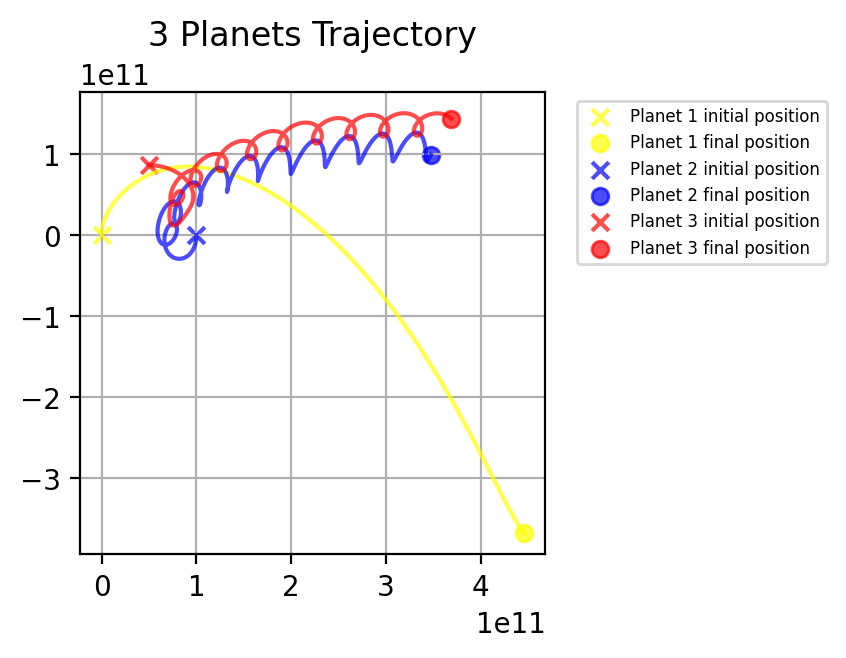

In [1186]:
three_planets.plot_trajectories()

- Planet 1: Starting from the top-left corner, this planet follows a steep downward trajectory. This might suggest an initial strong gravitational pull from the other planets, causing it to move significantly downward, before escaping their gravitational fields.

- Planet 2: This planet exhibits a cyclical trajectory, indicating it might be in a stable orbit influenced by the gravitational interactions with Planet 3. The repeated loops are characteristic of orbital motions in multi-body simulations.

- Planet 3: Its behavior is similar to Planet 2's one.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">3 Stars</h2>

Now we move to the three stars scenario. Basically, we want to keep distances and initial velocities directions not different from above, but heavily augmenting the masses and slightly enlarging the velocities.

In [1187]:
star1_mass = 1e30 # kg
star2_mass = 1.2e30 # kg
star3_mass = 1.5e30 # kg

distance = 1e11
G = 6.67e-11

v = np.sqrt(G * star1_mass / distance)

star1 = Body(0, 0, star1_mass, vx = 0, vy = v, name = "Star 1" )
star2 = Body(distance, 0, star2_mass, vx = 0, vy = -v, name = "Star 2")
star3 = Body(distance/2, distance * (3**0.5)/2, star3_mass, vx = v, vy = 0, name = "Star 3")

In [1188]:
three_stars = Simulation([star1, star2, star3], t_max = 1000 * 3.154e7, t_step= 50000, colors = ["yellow", "blue", "red"], name = "3 Stars")

In [1189]:
three_stars.run()

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  6.308e+05 ...  2.410e+08  2.416e+08]
        y: [[ 0.000e+00  2.760e+09 ...  2.322e+12  2.327e+12]
            [ 0.000e+00  1.784e+10 ...  5.861e+11  5.879e+11]
            ...
            [ 2.583e+04  2.506e+04 ... -5.996e+04 -8.906e+04]
            [ 0.000e+00 -8.049e+03 ...  3.589e+04  1.815e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20234
     njev: 0
      nlu: 0

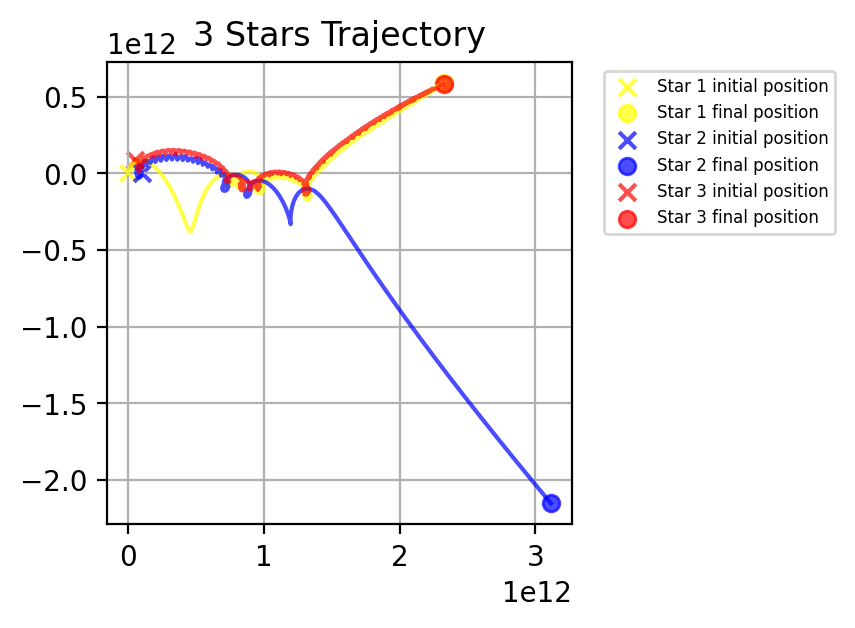

In [1190]:
three_stars.plot_trajectories()

- Star 1: Starts close to the other stars and soon shows a strong gravitational interaction with Star 3.

- Star 2: Initially follows the other stars before escaping their gravitational fields.

- Star 3: Similar to Star 1.


Unlike the previous simulation, where the stars started at nearly the same point but immediately took divergent paths, in this simulation, Star 1 and Star 2 follow more closely for a significant part of their trajectories, indicating a stronger initial interaction. The current trajectories are more complex and dynamic, with tighter loops and more abrupt changes in direction. This complexity likely results from the increased velocities and masses, causing more intense gravitational interactions.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">2 Stars 1 Planet</h2>

We mode to the following case: a bisolar system. We start with the same initial positions and velocities directions, but this time the planet's velocity is higher.

In [1191]:
star1_mass = 1e30 # kg
star2_mass = 1.2e30 # kg
planet1_mass = 1.5e16 # kg

distance = 1e11
G = 6.67e-11

v1 = np.sqrt(G * star1_mass / distance)
v2 = np.sqrt(G * planet1_mass / distance) + v1

star1 = Body(0, 0, star1_mass, vx = 0, vy = v1, name = "Star 1" )
star2 = Body(distance, 0, star2_mass, vx = 0, vy = -v1, name = "Star 2")
planet1 = Body(distance/2, distance * (3**0.5)/2, planet1_mass, vx = v2, vy = 0, name = "Planet 1")

In [1192]:
tsop = Simulation([star1, star2, planet1], t_max = 100 * 3.154e7, t_step= 50000, colors = ["yellow", "blue", "red"], name = "2 Stars 1 Planet")

In [1193]:
tsop.run()

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  6.308e+04 ...  2.767e+08  2.768e+08]
        y: [[ 0.000e+00  1.592e+07 ...  5.318e+11  5.320e+11]
            [ 0.000e+00  1.629e+09 ... -5.408e+11 -5.411e+11]
            ...
            [ 2.583e+04  2.586e+04 ...  2.102e+05 -2.927e+05]
            [ 0.000e+00 -8.016e+02 ...  1.743e+05  2.025e+05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 9656
     njev: 0
      nlu: 0

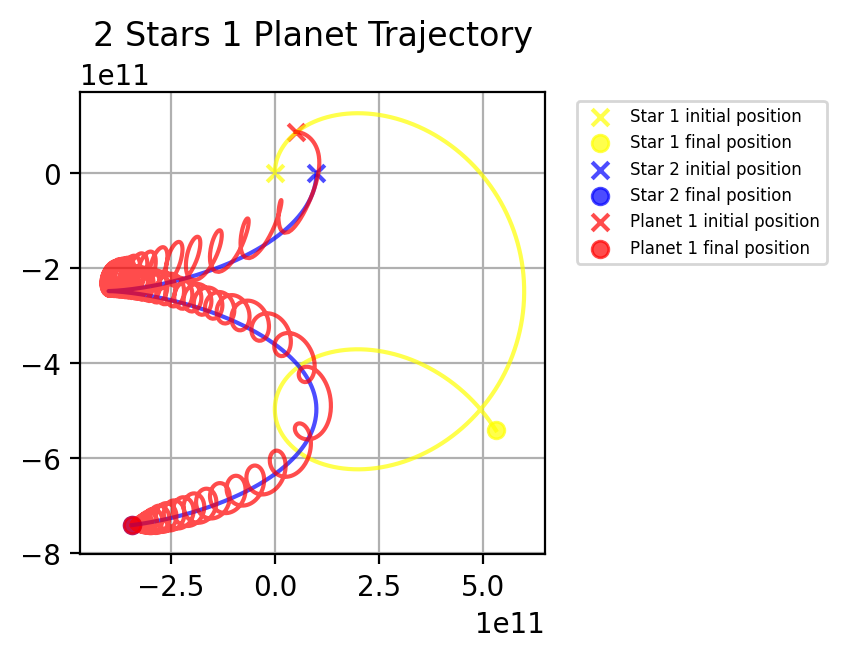

In [1194]:
tsop.plot_trajectories()

- Star 1: Begins its trajectory moving in a broad, curved path, ending below its initial position. This indicates a significant gravitational interaction, probably with Star 2 due to their mass.

- Star 2: Moves in a tight orbit, indicating that it is likely in a stable orbit.

- Planet 1: Shows a highly cyclical motion around Star 2. This looping path suggests that Star 2 has a substantial interaction with the planet, perhaps due to a comparative mass that allows for a strong mutual gravitational influence.

This simulation is a clear example of bodies with higher orders of magnitude of mass can 'dominate' the behavior or smaller bodies.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">1 Star 2 Planets</h2>

Again we use the same strategy as before. We only change the ratios of the masses.

In [1195]:
star1_mass = 1e34 # kg
planet1_mass = 1.2e24 # kg
planet2_mass = 1.5e22 # kg

distance = 1e11
G = 6.67e-11

v1 = np.sqrt(G * star1_mass / distance)
v2 = np.sqrt(G * planet1_mass / distance ) + v1

star1 = Body(0, 0, star1_mass, vx = 0, vy = v1, name = "Star 1" )
planet1 = Body(distance, 0, planet1_mass, vx = 0, vy = -v2, name = "Planet 1")
planet2 = Body(distance/2, distance * (3**0.5)/2, planet2_mass, vx = v2, vy = 0, name = "Planet 2")

In [1196]:
ostp = Simulation([star1, planet1, planet2], t_max = 100 * 3.154e7, t_step= 50000, colors = ["yellow", "blue", "red"], name = "2 planets 1 star")

In [1197]:
ostp.run()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.308e+04 ...  3.154e+09  3.154e+09]
        y: [[ 0.000e+00  7.691e+00 ...  4.734e+05  4.734e+05]
            [ 0.000e+00  1.629e+11 ...  8.145e+15  8.146e+15]
            ...
            [ 2.583e+06 -4.776e+05 ... -3.976e+04 -3.976e+04]
            [ 0.000e+00 -3.010e+05 ...  2.560e+06  2.560e+06]]
      sol: None
 t_events: None
 y_events: None
     nfev: 200
     njev: 0
      nlu: 0

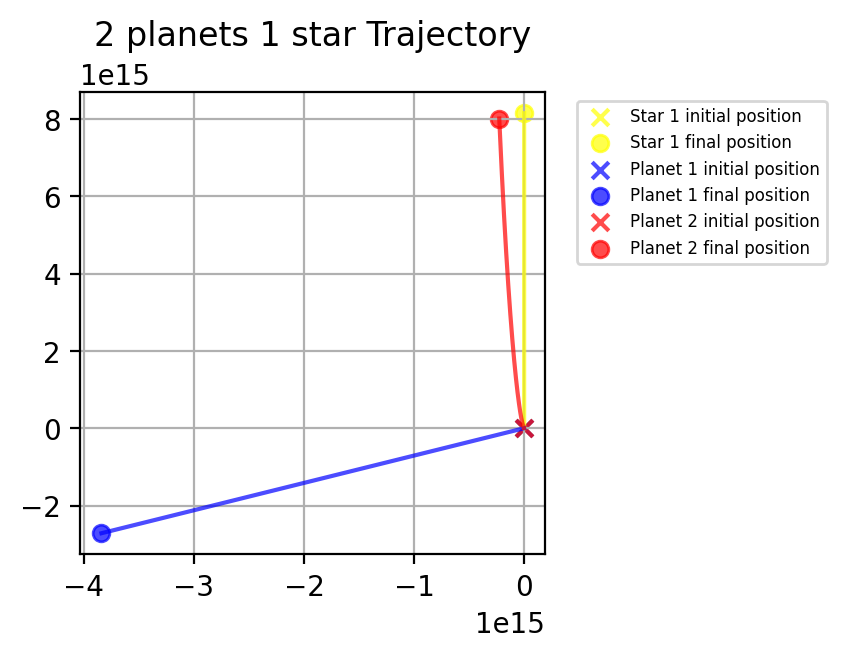

In [1198]:
ostp.plot_trajectories()

- Star 1: Appears stationary in the plot, indicating it's likely the center of mass or has a very dominant gravitational influence.

- Planet 1: Is expelled away soon.

- Planet 2: Follows the gravitational field of the star.


It is remarkable that the star's huge mass is leading the gravitational forces interactions.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">1 Star 1 Planet 1 Satellite</h2>

We let every body has its own initial velocity.

In [1199]:
star_mass = 1e30 # kg
planet_mass = 1.2e20 # kg
satellite_mass = 1.5e12 # kg

distance = 1e11
G = 6.67e-11

v1 = np.sqrt(G * star_mass / distance)
v2 = np.sqrt(G * planet_mass / distance)
v3 = np.sqrt(G * satellite_mass / distance)

star = Body(0, 0, star_mass, vx = 0, vy = v1, name = "Star 1" )
planet = Body(distance, 0, planet_mass, vx = 0, vy = - v2, name = "Planet 1")
satellite = Body(distance/2, distance * (3**0.5)/2, satellite_mass, vx = v3, vy = 0, name = "Satellite 1")

In [1200]:
simulation = Simulation([star, planet, satellite], t_max = 100 * 3.154e7, t_step= 50000, colors = ["yellow", "blue", "red"], name = "Solar system")

In [1201]:
simulation.run()

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  6.308e+04 ...  4.756e+08  4.757e+08]
        y: [[ 0.000e+00  1.592e-03 ...  1.205e+01  1.197e+01]
            [ 0.000e+00  1.629e+09 ...  1.228e+13  1.229e+13]
            ...
            [ 3.163e-05 -2.149e+02 ... -1.064e+04 -9.718e+03]
            [ 0.000e+00 -3.687e+02 ...  6.167e+04  6.100e+04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 10376
     njev: 0
      nlu: 0

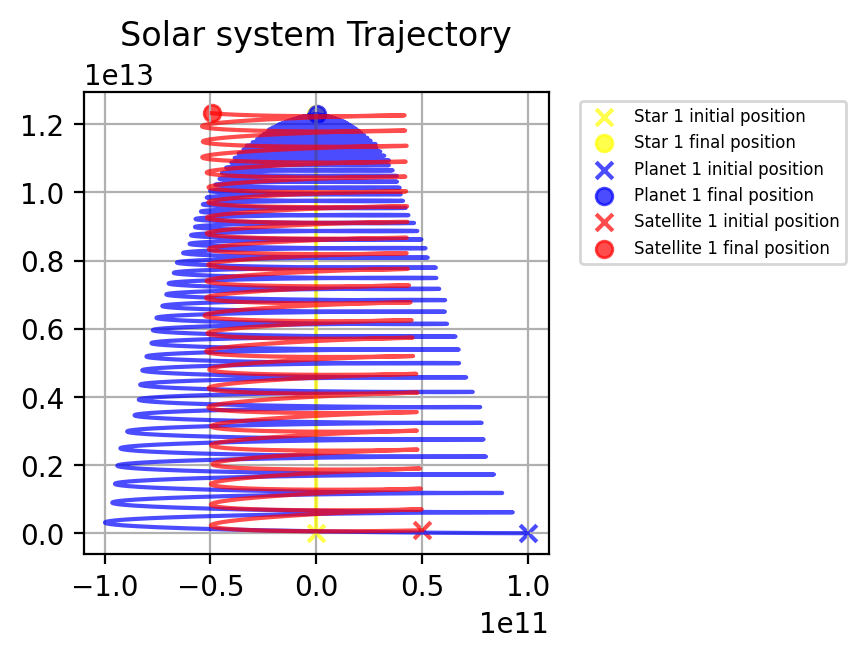

In [1202]:
simulation.plot_trajectories()

Star 1: Is stable, and keeps on going upwards.
Planet 1: It keeps rotating around the star.
Satellite 1: Seems to keep rotating againsta the star.

This remarks that again, the body with the highest mass is dominating the behavior of the system.

<h2 style="text-align: center; color : #E6BE8A; font-family: 'Fira Code', monospace;">1 Star 1 Planet 1 Satellite: Earth's Edition</h2>

We want to use masses close to the Solar System: the star will be our Sun, the planet is the Earth, and the satellite is the Moon.

In [1431]:
star_mass = 1.989e30 # kg
planet_mass = 5.972e24 # kg
satellite_mass = 7.348e22 # kg

distance1 = 1.476e11
distance2 = 3.854e6
G = 6.67e-11

v0 = 12035
v1 = 29780
v2 = 1022


star = Body(0, 0, star_mass, vx = v0, vy = 0, name = "star" )
planet = Body(distance1, 0, planet_mass, vx = 0, vy = v1, name = "planet")
satellite = Body(distance1, -distance2, satellite_mass, vx = v2, vy = v1, name = "satellite")

In [1432]:
simulation = Simulation([star, planet, satellite], t_max = 100 * 3.154e7, t_step = 50000, colors = ["yellow", "blue", "grey"], name = "Solar system")

In [1433]:
simulation.run()

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00  6.308e+04 ...  3.316e+08  3.317e+08]
        y: [[ 0.000e+00  7.592e+08 ...  3.991e+12  3.992e+12]
            [ 0.000e+00  1.574e-01 ...  3.018e+07  3.019e+07]
            ...
            [ 1.022e+03 -8.291e+02 ... -2.559e+05 -2.447e+05]
            [ 2.978e+04  2.396e+04 ... -3.063e+05  5.702e+05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 12062
     njev: 0
      nlu: 0

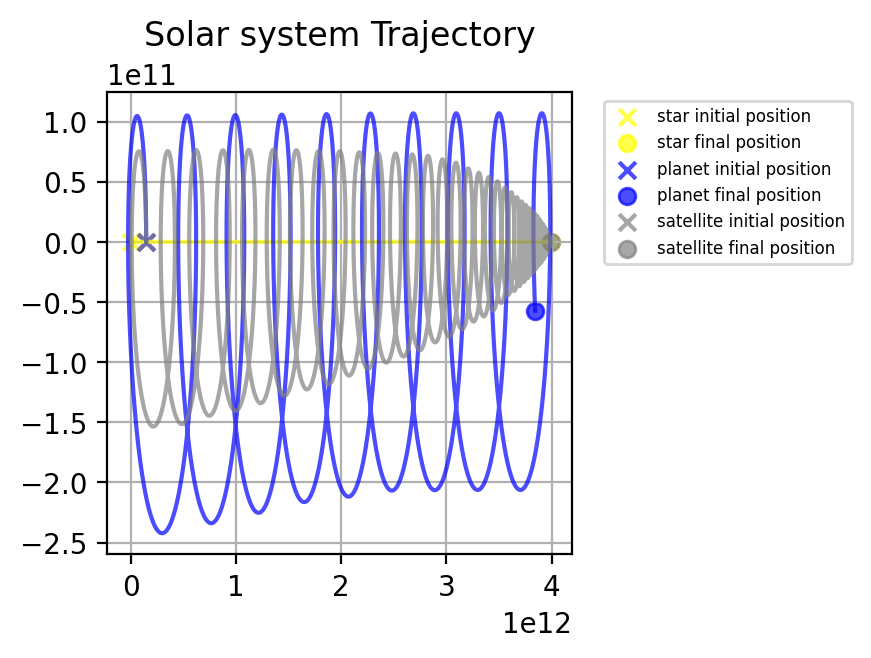

In [1434]:
simulation.plot_trajectories()

The plot shows an intuitive behavior: the Sun's gravitational force is dominating the Earth's motion. The Moons behavior is clearly not the same as the real one, this is due to the fact that we didn't use exact coordinates and initial velocities.

An important limitation is that we are not dealing with the third dimension, losing much information. In fact, orbitals very rarely lie all in the same plane.

Let's change slightly the ratio of the masses and see how it behaves, in order to show that it is a chaotic system.

In [1435]:
star_mass = 1.989e30 # kg
planet_mass = 5.972e24 # kg
satellite_mass = 7.348e22 # kg

distance1 = 1.476e11
distance2 = 3.854e6
G = 6.67e-11

v0 = 12035
v1 = 29780
v2 = 1022


star = Body(0, 0, star_mass*1.1, vx = v0, vy = 0, name = "star" )
planet = Body(distance1, 0, planet_mass*1.3, vx = 0, vy = v1, name = "planet")
satellite = Body(distance1, -distance2, satellite_mass*1.2, vx = v2, vy = v1, name = "satellite")

In [1436]:
simulation = Simulation([star, planet, satellite], t_max = 100 * 3.154e7, t_step = 50000, colors = ["yellow", "blue", "grey"], name = "Solar system")

In [ ]:
simulation.run()